### Day 8 - Treetop Tree House
##### Part 1

Given an array of tree heights, return how many are visible from outside the grid.

Visible - all other trees between it and an edge are shorter than it.   

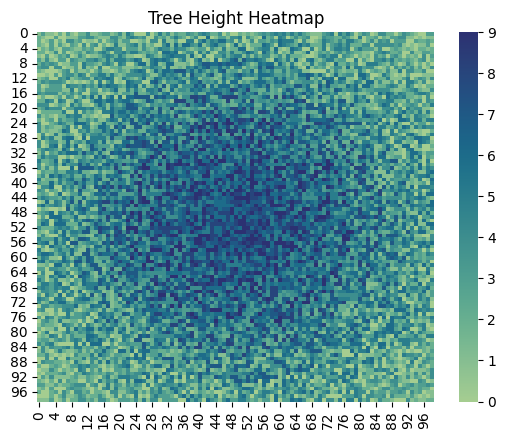

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

with open("aoc_08_input.txt", "r") as f:
    treetops = list([int(c) for c in line] for line in f.read().split())
size = len(treetops)

sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(treetops, cmap="crest")
ax.set_title("Tree Height Heatmap")
plt.show()


In [2]:
confirmed_trees = {(a, 0) for a in range(size)} | {(0, a) for a in range(size)} | {(size-1, a) for a in range(size)} | {(a, size-1) for a in range(size)}

def countIncreasingTrees(slice, dependentIndex, rotationNum):
    curr_max = slice[0]
    for cellIndex, val in enumerate(slice[1:-1], start = 1):
        if val > curr_max:
            if rotationNum == 0:        confirmed_trees.add((dependentIndex,            cellIndex))
            elif rotationNum == 1:      confirmed_trees.add((size - cellIndex - 1,      dependentIndex))
            elif rotationNum == 2:      confirmed_trees.add((size - dependentIndex - 1, size - cellIndex - 1))
            else:                       confirmed_trees.add((cellIndex,                 size - dependentIndex - 1))
            curr_max = val
        if curr_max == 9:
            return

for j in range(4):    
    for i, row in enumerate(treetops[1:-1], start = 1):
        countIncreasingTrees(row, i, j)
    treetops = list(zip(*treetops[::-1]))

visibleTrees = [list(T) for T in treetops]

for i in range(size):
    for j in range(size):
        if (i,j) not in confirmed_trees:
            visibleTrees[i][j] = -1

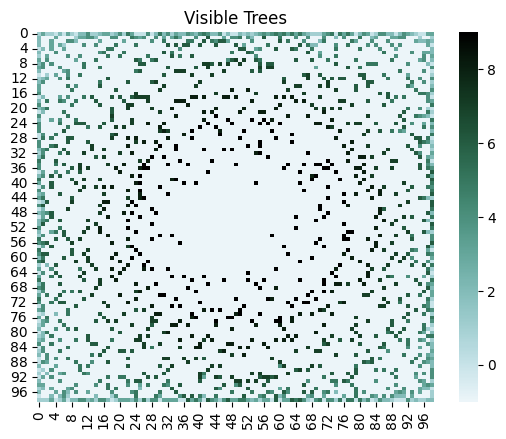

Total visible Trees: 1719


In [3]:
palette = sns.cubehelix_palette(start=2, rot=.20, dark=0, light=.95, reverse=False, as_cmap=True)
bx = sns.heatmap(visibleTrees, vmin = -1, cmap=palette)
bx.set_title("Visible Trees")
plt.show()      

print(f"Total visible Trees: {len(confirmed_trees)}")    

##### Part 2 - Best Treehouse

Find the best scenic score for any tree on the map.

Scenic score : product of unblocked distances NSEW.

In [4]:

scenicScores =  np.array([[0 for _ in range(size)] for _ in range(size)])
rotatedTreetops = list(zip(*treetops[::-1]))

def calcScenicScore(val, left, right, up, down):
    a, b, c, d = 0, 0, 0, 0
    while a < len(left)  - 1    and  left[a]  < val:     a += 1
    while b < len(right) - 1    and  right[b] < val:     b += 1
    while c < len(up)    - 1    and  up[c]    < val:     c += 1
    while d < len(down)  - 1    and  down[d]  < val:     d += 1
    return (a + 1) * (b + 1) * (c + 1) * (d + 1)

for x_idx, row in enumerate(treetops[1:-1], start = 1):
    for y_idx, cell in enumerate(row[1:-1], start = 1):
        scenicScores[x_idx][y_idx] = calcScenicScore(cell, list(row[:y_idx])[::-1], list(row[y_idx+1:]), list(rotatedTreetops[y_idx][-x_idx:]), list(rotatedTreetops[y_idx][:-x_idx-1][::-1]))

cand = [max(row) for row in scenicScores]
print(f"The best scenic score in the forest is {max(cand)}.")

The best scenic score in the forest is 590824.


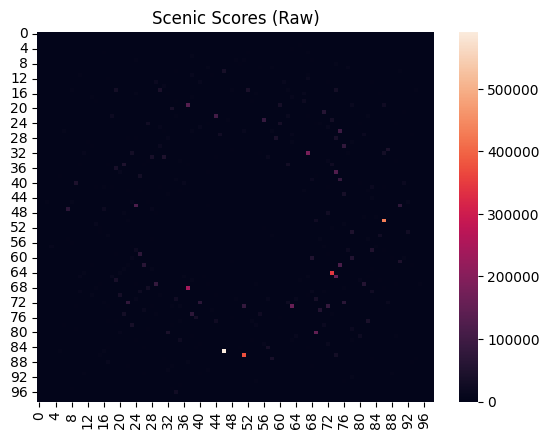

In [5]:
cx = sns.heatmap(scenicScores, cmap="rocket")
cx.set_title("Scenic Scores (Raw)")
plt.show()

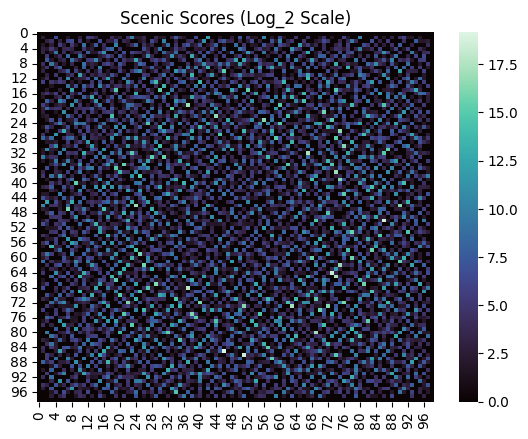

In [6]:
logValues = [[np.log2(val) if val > 2 else 0 for val in row] for row in scenicScores]
dx = sns.heatmap(logValues, cmap="mako")
dx.set_title("Scenic Scores (Log_2 Scale)")
plt.show()